# SMOTE for balancing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [2]:
# synthetic binary dataset, imbalancing with 1:100 distribution
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# counting classes
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


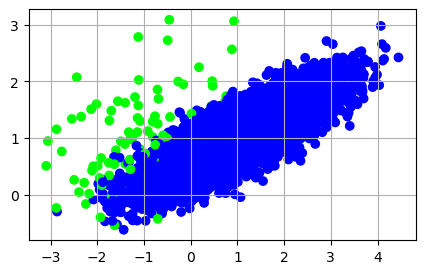

In [3]:
# plotting dataset
plt.figure(figsize=(5, 3))
#colors = ['blue' if l==0 else 'green' for l in y]
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg') #,color=colors)
#plt.legend()
plt.grid()
plt.show()

In [4]:
X.shape

(10000, 2)

In [5]:
## transform the dataset
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


In [6]:
X1.shape

(19800, 2)

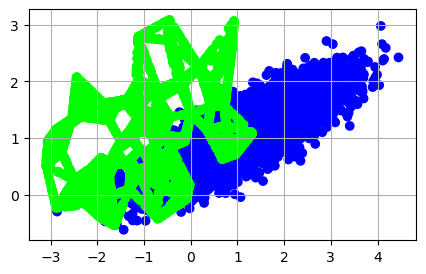

In [7]:
# plotting dataset
plt.figure(figsize=(5, 3))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap='brg') #,color=colors)
plt.grid()
plt.show()

- The SMOTE with default parameter will balance the minority class and then fit and apply it in one step to create a transformed version of our dataset.

## Combining SMOTE with Random undersampling of the majority class
- We use `SMOTE` and `RandomUnderSampler` classes
- Then, chain these two tranformers together into a `Pipeline`. The Pipeline can be applied to a dataset, performing each tranformation in turn and returning a final dataset with the accumulation of the tranform applied to it.
- We could expect SMOTE oversampling of the minority class, that is not much as before the dataset was balanced.

In [2]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [9]:
print(Counter(y))

Counter({0: 9900, 1: 100})


In [10]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
# make pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform dataset
X2, y2 = pipeline.fit_resample(X, y)
print(Counter(y2))

Counter({0: 1980, 1: 990})


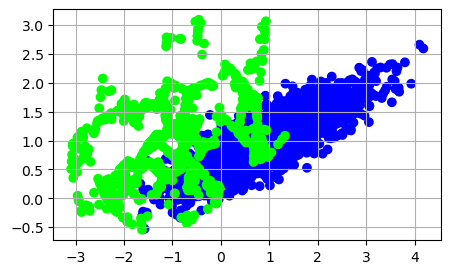

In [11]:
plt.figure(figsize=(5, 3))
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='brg') #,color=colors)
plt.grid()
plt.show()

# SMOTE for Classification
Using SMOTE as data preparation method when fitting and evaluating ML algorithm. 

In [3]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

## SMOTE and Classifier
Using default parameters of the classifier 

In [13]:
# classify dataset with model only
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='roc_auc', cv=cv, n_jobs=1)

In [17]:
def printed(scores):
    print('Mean score: %.3f' % np.mean(scores))
    
printed(scores)

Mean score: 0.769


In [18]:
np.random.seed(1)
# combine SMOTE with the model
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=1)
printed(scores)

Mean score: 0.819


In [19]:
## combination of oversampling, undersampling and model to classify dataset
steps = [('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=1)
printed(scores)

Mean score: 0.844


# SMOTE with selective synthetic sample generation
Samples are more selective regarding from the minority class that provide the basic for generating new synthetic examples. 
## Borderline-SMOTE
Selecting instances of the minority class that are misclassified, such as with a k-nearest neighbor classification model. We can then oversample just those difficult instances, providing more resolution only where it may be required.

We can implement the `BorderlineSMOTE` class from imbalanced-learn.

Instead of **generating new synthetic samples** for the minority class, We will expect this method to only create synthetic examples along the decision boundary between the 2 classes.

In [20]:
## borderlineSMOTE for imbalanced dataset.
from imblearn.over_sampling import BorderlineSMOTE

print(Counter(y))

oversample = BorderlineSMOTE()
X3, y3 = oversample.fit_resample(X, y)
print(Counter(y3))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


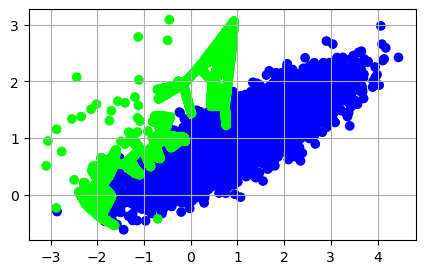

In [21]:
plt.figure(figsize=(5, 3))
plt.scatter(X3[:, 0], X3[:, 1], c=y3, cmap='brg') #,color=colors)
plt.grid()
plt.show()

In [22]:
## clean memory
del X1, X2, X3, y1, y2, y3

## Borderline-SMOTE SVM
Using the SVM classifier instead of KNN classifier to identify mislassified examples on the decision boundary. This technique try to attempt to select regions where there are few samples of minority class and tries to extrapolate towards the class boundary.

We implement `SVMSMOTE` class from imbalanced-learn

In [23]:
## Borderline-SMOTE with SVM
from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
X4, y4 = oversample.fit_resample(X, y)
print(Counter(y4))

Counter({0: 9900, 1: 9900})


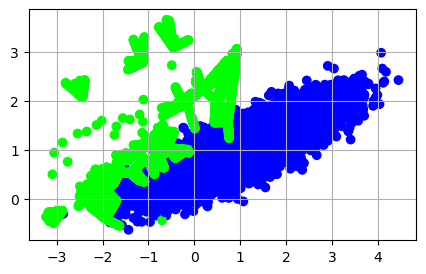

In [25]:
plt.figure(figsize=(5, 3))
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap='brg') #,color=colors)
plt.grid()
plt.show()

## Adaptive Synthetic sampling (ADASYN)
Generating synthetic samples inversely proportional to the density of the examples in the minority class (low distribution). 

The ADASYN uses a density distribution as a criterion to automatically decide the number of synthetic samples that need to be generated for each minority data example.

Unlike Borderline-SMOTE, we can see that the examples that have the most class overlap have the most focus. On problems where these low density examples might be outliers, the ADASYN approach may put too much attention on these areas of the feature space, which may result in worse model performance.

In [26]:
## ADASYN with imbalanced-learn
from imblearn.over_sampling import ADASYN

oversample = ADASYN()
X4, y4 = oversample.fit_resample(X, y)
print(Counter(y4))

Counter({0: 9900, 1: 9899})


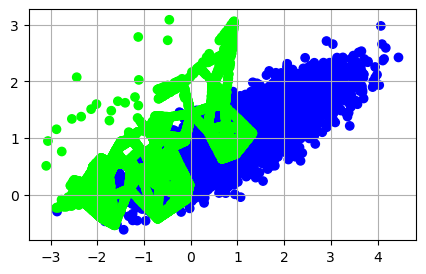

In [27]:
plt.figure(figsize=(5, 3))
plt.scatter(X4[:, 0], X4[:, 1], c=y4, cmap='brg') #,color=colors)
plt.grid()
plt.show()

In [28]:
del X4, y4

# One-Class Classification Algorithms for Imbalanced datasets
Outliers and anomalies are rare examples that don't fit in with the rest of the data (distribution). A single variable may have an outlier far from the mass of examples, which can skew summary statistics such as the mean and variance. So, fitting in a ML model that requires the identification and removal of outliers as a data preparation technique. 

One-class classification involves fitting a model on the "normal" data and predicting whether new data is normal or and outlier/anomaly. It can be used for a binary classification (2-class) where the negative case (class 0) is taken as "normal" and the positive case (class 1) is taken as an outlier/anomaly.

- **Negative case**: Normal or inlier
- **Positive case**: Anomaly or outlier

In [4]:
## define an Imbalanced dataset
X, y = make_classification(n_samples=10_000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
print(Counter(y))

Counter({0: 9990, 1: 10})


In [7]:
def plotting(X, y):
    plt.figure(figsize=(5, 3))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg') #,color=colors)
    plt.grid()
    plt.show()

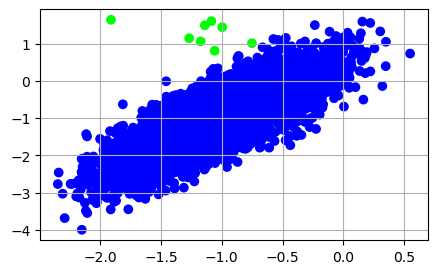

In [8]:
plotting(X, y)


## One-class SVM
For imbalanced classification, the good idea to evaluate the standard SVM and weighted SVM on the dataset before testing the one-class version.

When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers.

In [2]:
## using sklearn libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.svm import OneClassSVM

In [27]:
np.random.seed(4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)
model = OneClassSVM(gamma='scale', nu=0.01)

In [28]:
print(Counter(y_train))

Counter({0: 7992, 1: 8})


In [29]:
# takes only the majority class
X_train = X_train[y_train==0]

In [30]:
model.fit(X_train)

OneClassSVM(nu=0.01)

In [31]:
# marks inlier 1, outlier -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
score = f1_score(y_test, yhat, pos_label=-1)
print(score)

0.12903225806451613


In [32]:
print(Counter(yhat))

Counter({1: 1971, -1: 29})


In [33]:
print(Counter(y_test))

Counter({1: 1998, -1: 2})


In [26]:
accuracy_score(y_test, yhat, normalize=True)

0.9865

## Isolation Forest
Detects anomilies purely based on the concept of isolation without employing any distance or density measure.

The method predicts of two's anomilies' quantitative properties:
- They are the minority consisting of fewer instance.
- They have attribute-values that are very different from those of normal instances.

The most important hyperparameters of the model is `"n_estimators"` argument that sets to the number of trees to create and the `"contamination"` argument, which is used to define the number of outliers in dataset. In our case, we know the number of outliers that is about 0.01% positive cases to negative cases, so, `contamination=0.01`

In [34]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)

model.fit(X_train)

IsolationForest(contamination=0.01)

In [35]:
yhat = model.predict(X_test)
score = f1_score(y_test, yhat, pos_label=-1)
score

0.14285714285714288

In [36]:
# the contamination is too low, so increasing a bit 0.05
model = IsolationForest(contamination=0.05)
model.fit(X_train)

IsolationForest(contamination=0.05)

In [37]:
yhat = model.predict(X_test)
f1_score(y_test, yhat, pos_label=-1)

0.03669724770642201

In [38]:
# the contamination is too low, so increasing a bit 0.05
model = IsolationForest(contamination=0.1)
model.fit(X_train)

IsolationForest(contamination=0.1)

In [39]:
yhat = model.predict(X_test)
f1_score(y_test, yhat, pos_label=-1)

0.01923076923076923

In [40]:
print(Counter(yhat))

Counter({1: 1794, -1: 206})


## Minimum Covariance Determinant
This approach can be generalized by defining a hyperphere (ellisoid) that cover the normal data, and data that falls outside this shape is considered and outlier. An efficient implementation of this technique for multivariate data is known as the Minimum Covariance Determinant. It is unusual to have such well-behaved data, but if this is the case for your dataset, or you can use power transforms to make the variables Gaussian, then this approach might be appropriate.

In [41]:
from sklearn.covariance import EllipticEnvelope

model = EllipticEnvelope(contamination=0.01)
model.fit(X_train)

EllipticEnvelope(contamination=0.01)

In [42]:
yhat = model.predict(X_test)
f1_score(y_test, yhat, pos_label=-1)

0.17391304347826084

## Local Outlier Factor
A simple approach to identifying outliers is to locate those examples that are far from the other examples in the feature space. The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers.

In [43]:
from sklearn.neighbors import LocalOutlierFactor

model = LocalOutlierFactor(contamination=0.01)
model.fit(X_train)

LocalOutlierFactor(contamination=0.01)

In [46]:
# make a prediction with a lof model
def lof_predict(model, trainX, testX):
 # create one large dataset
 composite = np.vstack((trainX, testX))
 # make prediction on composite dataset
 yhat = model.fit_predict(composite)
 # return just the predictions on the test set
 return yhat[len(trainX):]

yhat = lof_predict(model, X_train, X_test)
f1_score(y_test, yhat, pos_label=-1)

0.18181818181818182